# Ralab???


In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bidi.algorithm import get_display
from importlib import reload
import sys

sys.path.append("..")
from src import vote_utils as vu
from src import plot_utils as pu
from src import dissimilarity_analysis as da

vu = reload(vu)
plt.rcParams['figure.dpi'] = 100



%matplotlib inline
dir_data = '/Users/boris/devel/jce/segregation/data'
dir_external = os.path.join(dir_data, 'external')

## Last available data

In [17]:
df_columns = pd.read_csv(os.path.join(dir_external, 'columns.csv'))
df_columns.head()
dct_rename = df_columns[['heb', 'eng']].set_index('heb').eng.to_dict()

In [18]:
df_25 = pd.read_csv(os.path.join(dir_external, 'results_25.csv'))
# rename columns
df_25 = df_25.rename(columns=dct_rename)
df_25.head()

,סמל ועדה,ברזל,city_name,city_code,ballot_code,ריכוז,שופט,can_vote,voted,void,...,party_tzadik,party_tzadik_sofit,party_kuf,party_kalkala_yehudit,party_kaf_kuf,party_kulanu,party_kavod_ezrahi,party_habayit_hayehudi,party_shas,party_tikva
0,18,10619,אבו גווייעד שבט,967,3.1,1,0,570,173,4,...,0,0,0,0,0,0,0,0,0,2
1,18,10620,אבו גווייעד שבט,967,3.2,1,0,570,96,1,...,0,0,0,0,0,0,0,0,0,1
2,18,10621,אבו גווייעד שבט,967,3.3,1,0,570,169,1,...,0,0,0,0,0,0,0,0,2,0
3,18,10622,אבו גווייעד שבט,967,3.4,1,0,569,111,3,...,1,0,0,0,0,0,0,0,2,0
4,2,806,אבו גוש,472,1.1,5,0,598,360,7,...,0,1,0,0,0,0,0,0,0,0


In [19]:
ralab_parties = [row.eng for row in df_columns.itertuples() if row.ralab == 'true']
rab_parties = [row.eng for row in df_columns.itertuples() if row.ralab == 'false']
print(f'Ralab parties: {ralab_parties}')
print(f'Rab parties: {rab_parties}')
df_25['group_ralab'] = df_25[ralab_parties].sum(axis=1)
df_25['group_rab'] = df_25[rab_parties].sum(axis=1)
df_25.head()


Ralab parties: ['party_avoda', 'party_kahol_lavan', 'party_israel_beitenu', 'party_meretz', 'party_yesh_atid', 'party_new_hope']
Rab parties: ['party_bayit_yehudi', 'party_agudat_israel', 'party_likud', 'party_shas', 'party_ihud_leumi', 'party_zionut_datit', 'party_yemin_hadash', 'party_noam', 'party_habayit_hayehudi']


,סמל ועדה,ברזל,city_name,city_code,ballot_code,ריכוז,שופט,can_vote,voted,void,...,party_kuf,party_kalkala_yehudit,party_kaf_kuf,party_kulanu,party_kavod_ezrahi,party_habayit_hayehudi,party_shas,party_tikva,group_ralab,group_rab
0,18,10619,אבו גווייעד שבט,967,3.1,1,0,570,173,4,...,0,0,0,0,0,0,0,2,1,9
1,18,10620,אבו גווייעד שבט,967,3.2,1,0,570,96,1,...,0,0,0,0,0,0,0,1,1,1
2,18,10621,אבו גווייעד שבט,967,3.3,1,0,570,169,1,...,0,0,0,0,0,0,2,0,4,2
3,18,10622,אבו גווייעד שבט,967,3.4,1,0,569,111,3,...,0,0,0,0,0,0,2,0,1,5
4,2,806,אבו גוש,472,1.1,5,0,598,360,7,...,0,0,0,0,0,0,0,0,16,11


In [41]:
cols_to_take = ['city_name', 'city_code', 'can_vote', 'voted', 'legal',] + [c for c in df_25.columns if 'party' in c or 'group' in c]
df_25 = df_25[cols_to_take].copy()


In [42]:
df_25[cols_to_take].head().groupby(['city_name', 'city_code'])

In [43]:
sel_haredi = vu.is_homogenic(df_25)
sel_homogenic = vu.is_homogenic(df_25, parties=ralab_parties + rab_parties)
df_25_city_homogenic = (
    df_25.loc[
        sel_homogenic
        & (~sel_haredi)
        ][cols_to_take]
    .groupby(["city_code", "city_name"])
    .sum()
    .sort_values(by="legal", ascending=False)
    .reset_index()
)
df_25_city_homogenic = df_25_city_homogenic[
    df_25_city_homogenic.can_vote > 0  # remove מעטפות חיצוניות
].head(15).iloc[-1::-1]
df_25_city_homogenic

,city_code,city_name,can_vote,voted,legal,party_avoda,party_ihud_leumi,party_bayit_yehudi,party_agudat_israel,party_daam,...,party_kuf,party_kalkala_yehudit,party_kaf_kuf,party_kulanu,party_kavod_ezrahi,party_habayit_hayehudi,party_shas,party_tikva,group_ralab,group_rab
15,6900,כפר סבא,81737,57122,56903,3734,249,627,269,17,...,22,0,10,13,298,1,2003,8,36594,15541
14,6400,הרצליה,88932,58374,58166,3351,276,455,465,30,...,14,0,10,13,214,3,2050,7,38533,15618
13,6200,בת ים,123550,62553,62001,1170,165,305,633,81,...,28,10,32,29,195,25,5925,39,24977,29340
12,8400,רחובות,103977,71395,71082,3098,269,944,2251,39,...,28,7,24,12,235,15,5172,12,34484,27015
11,7100,אשקלון,119846,74187,73602,880,209,477,788,25,...,32,6,27,27,172,33,8649,29,23449,39391
10,8600,רמת גן,137360,89543,89179,5938,528,955,820,75,...,24,3,29,24,449,10,3413,15,55832,25519
9,9000,באר שבע,158764,96943,96176,1822,359,661,1374,175,...,49,8,24,24,235,35,8649,45,29530,50125
8,70,אשדוד,163754,101703,101017,1042,239,515,5217,26,...,44,13,20,39,182,62,14362,39,36048,53694
7,6600,חולון,159831,102424,101811,2890,338,693,849,22,...,34,9,33,33,320,19,10719,31,42047,47927
6,7400,נתניה,191551,111168,110432,1998,319,1089,2861,19,...,46,7,35,36,326,27,13414,54,39553,57253


In [ ]:
df_25_boxes_homogenic = df_25.loc[
    sel_homogenic
    & (~sel_haredi)
    ][cols_to_take]
# only take cities in df_25_city_homogenic
df_25_boxes_homogenic = df_25_boxes_homogenic[df_25_boxes_homogenic['city_code'].isin(df_25_city_homogenic['city_code'])].copy()
df_25_boxes_homogenic

,city_name,city_code,can_vote,voted,legal,party_avoda,party_ihud_leumi,party_bayit_yehudi,party_agudat_israel,party_daam,...,party_kuf,party_kalkala_yehudit,party_kaf_kuf,party_kulanu,party_kavod_ezrahi,party_habayit_hayehudi,party_shas,party_tikva,group_ralab,group_rab
640,אשדוד,70,625,277,277,1,0,1,1,0,...,0,0,0,0,1,0,18,1,94,143
641,אשדוד,70,625,191,191,4,0,1,4,0,...,0,0,0,0,0,0,23,0,89,83
642,אשדוד,70,625,247,243,4,0,1,8,0,...,0,0,0,0,0,0,24,0,98,119
643,אשדוד,70,622,196,189,4,1,0,3,0,...,0,0,1,0,0,0,9,0,107,69
644,אשדוד,70,434,264,259,0,0,4,5,0,...,0,0,0,0,0,0,44,0,90,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12468,תל אביב יפו,5000,526,282,278,7,3,2,2,13,...,0,0,0,0,1,0,37,0,82,153
12469,תל אביב יפו,5000,526,271,266,4,0,1,1,9,...,0,1,0,0,0,0,28,0,88,135
12470,תל אביב יפו,5000,526,249,247,6,0,0,1,10,...,0,0,0,1,1,0,30,0,86,120
12471,תל אביב יפו,5000,522,308,308,5,0,2,0,9,...,1,0,0,0,1,0,37,1,108,151


In [45]:
df_25_city_homogenic['rest'] = df_25_city_homogenic['legal'] - df_25_city_homogenic['group_ralab'] - df_25_city_homogenic['group_rab']
df_25_city_homogenic = df_25_city_homogenic[['city_name', 'group_ralab', 'group_rab', 'rest', 'legal']].copy()


In [55]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Literal

COLOR_RALAB = "#ba62b7"
COLOR_RAB = "#3864a9"
COLOR_REST = "lightgray"


def plot_ralab_data(df_ratio, what: Literal["total", "split", "difference"]):
    if 'city' in df_ratio.columns:
        df_ratio = df_ratio.set_index('city')
    elif 'city_name' in df_ratio.columns:
        df_ratio = df_ratio.set_index('city_name')
    y = np.arange(df_ratio.shape[0])
    w = 9
    h = w * 9 / 16
    fig, ax = plt.subplots(figsize=(w, h), dpi=300)

    if what == "total":
        ax.barh(y=y, width=df_ratio.legal, color="darkgrey")

    elif what == "split":
        ax.barh(
            y=y,
            width=df_ratio.group_ralab,
            color=COLOR_RALAB,
        )
        ax.barh(
            y=y,
            width=df_ratio.group_rab,
            left=df_ratio.group_ralab,
            color=COLOR_RAB,
        )
        ax.barh(
            y=y,
            width=df_ratio.rest,
            left=df_ratio.group_rab + df_ratio.group_ralab,
            color=COLOR_REST,
        )

    elif what == "difference":
        ax.barh(
            y=y,
            width=df_ratio.group_rab,
            color=COLOR_RAB,
        )
        ax.barh(
            y=y,
            width=-df_ratio.group_ralab,
            color=COLOR_RALAB,
        )
        for yy, (city, row) in enumerate(df_ratio.iterrows()):
            if row.group_rab > row.group_ralab:
                ax.barh(yy, row.group_ralab, color=COLOR_RALAB, alpha=0.25)
            else:
                ax.barh(yy, -row.group_rab, color=COLOR_RAB, alpha=0.25)

    ax.set_yticks(y)
    ax.set_yticklabels([pu.heb(city) for city in df_ratio.index])
    sns.despine(ax=ax, left=True)
    if what == "difference":
        xticks = [-df_ratio.group_ralab.max(), 0, df_ratio.group_rab.max()]
        ax.axvline(0, color="black", linewidth=1.0)
    else:
        mid_point = df_ratio.legal.max() // 2
        diffs = np.abs(df_ratio.legal - mid_point)
        ix = np.argmin(diffs)
        mid_city_data = df_ratio.iloc[ix].legal
        xticks = [0, mid_city_data, df_ratio.legal.max()]
    xticks = np.round(xticks, -2).astype(int)
    ax.set_xticks(xticks)
    ax.set_xticklabels([f"{abs(x):,}" for x in xticks])
    ax.tick_params(axis="y", labelsize=12)
    ax.tick_params(axis="y", size=0)
    ax.set_xlabel(pu.heb("קולות בקלפיות הומוגניות בלבד"))

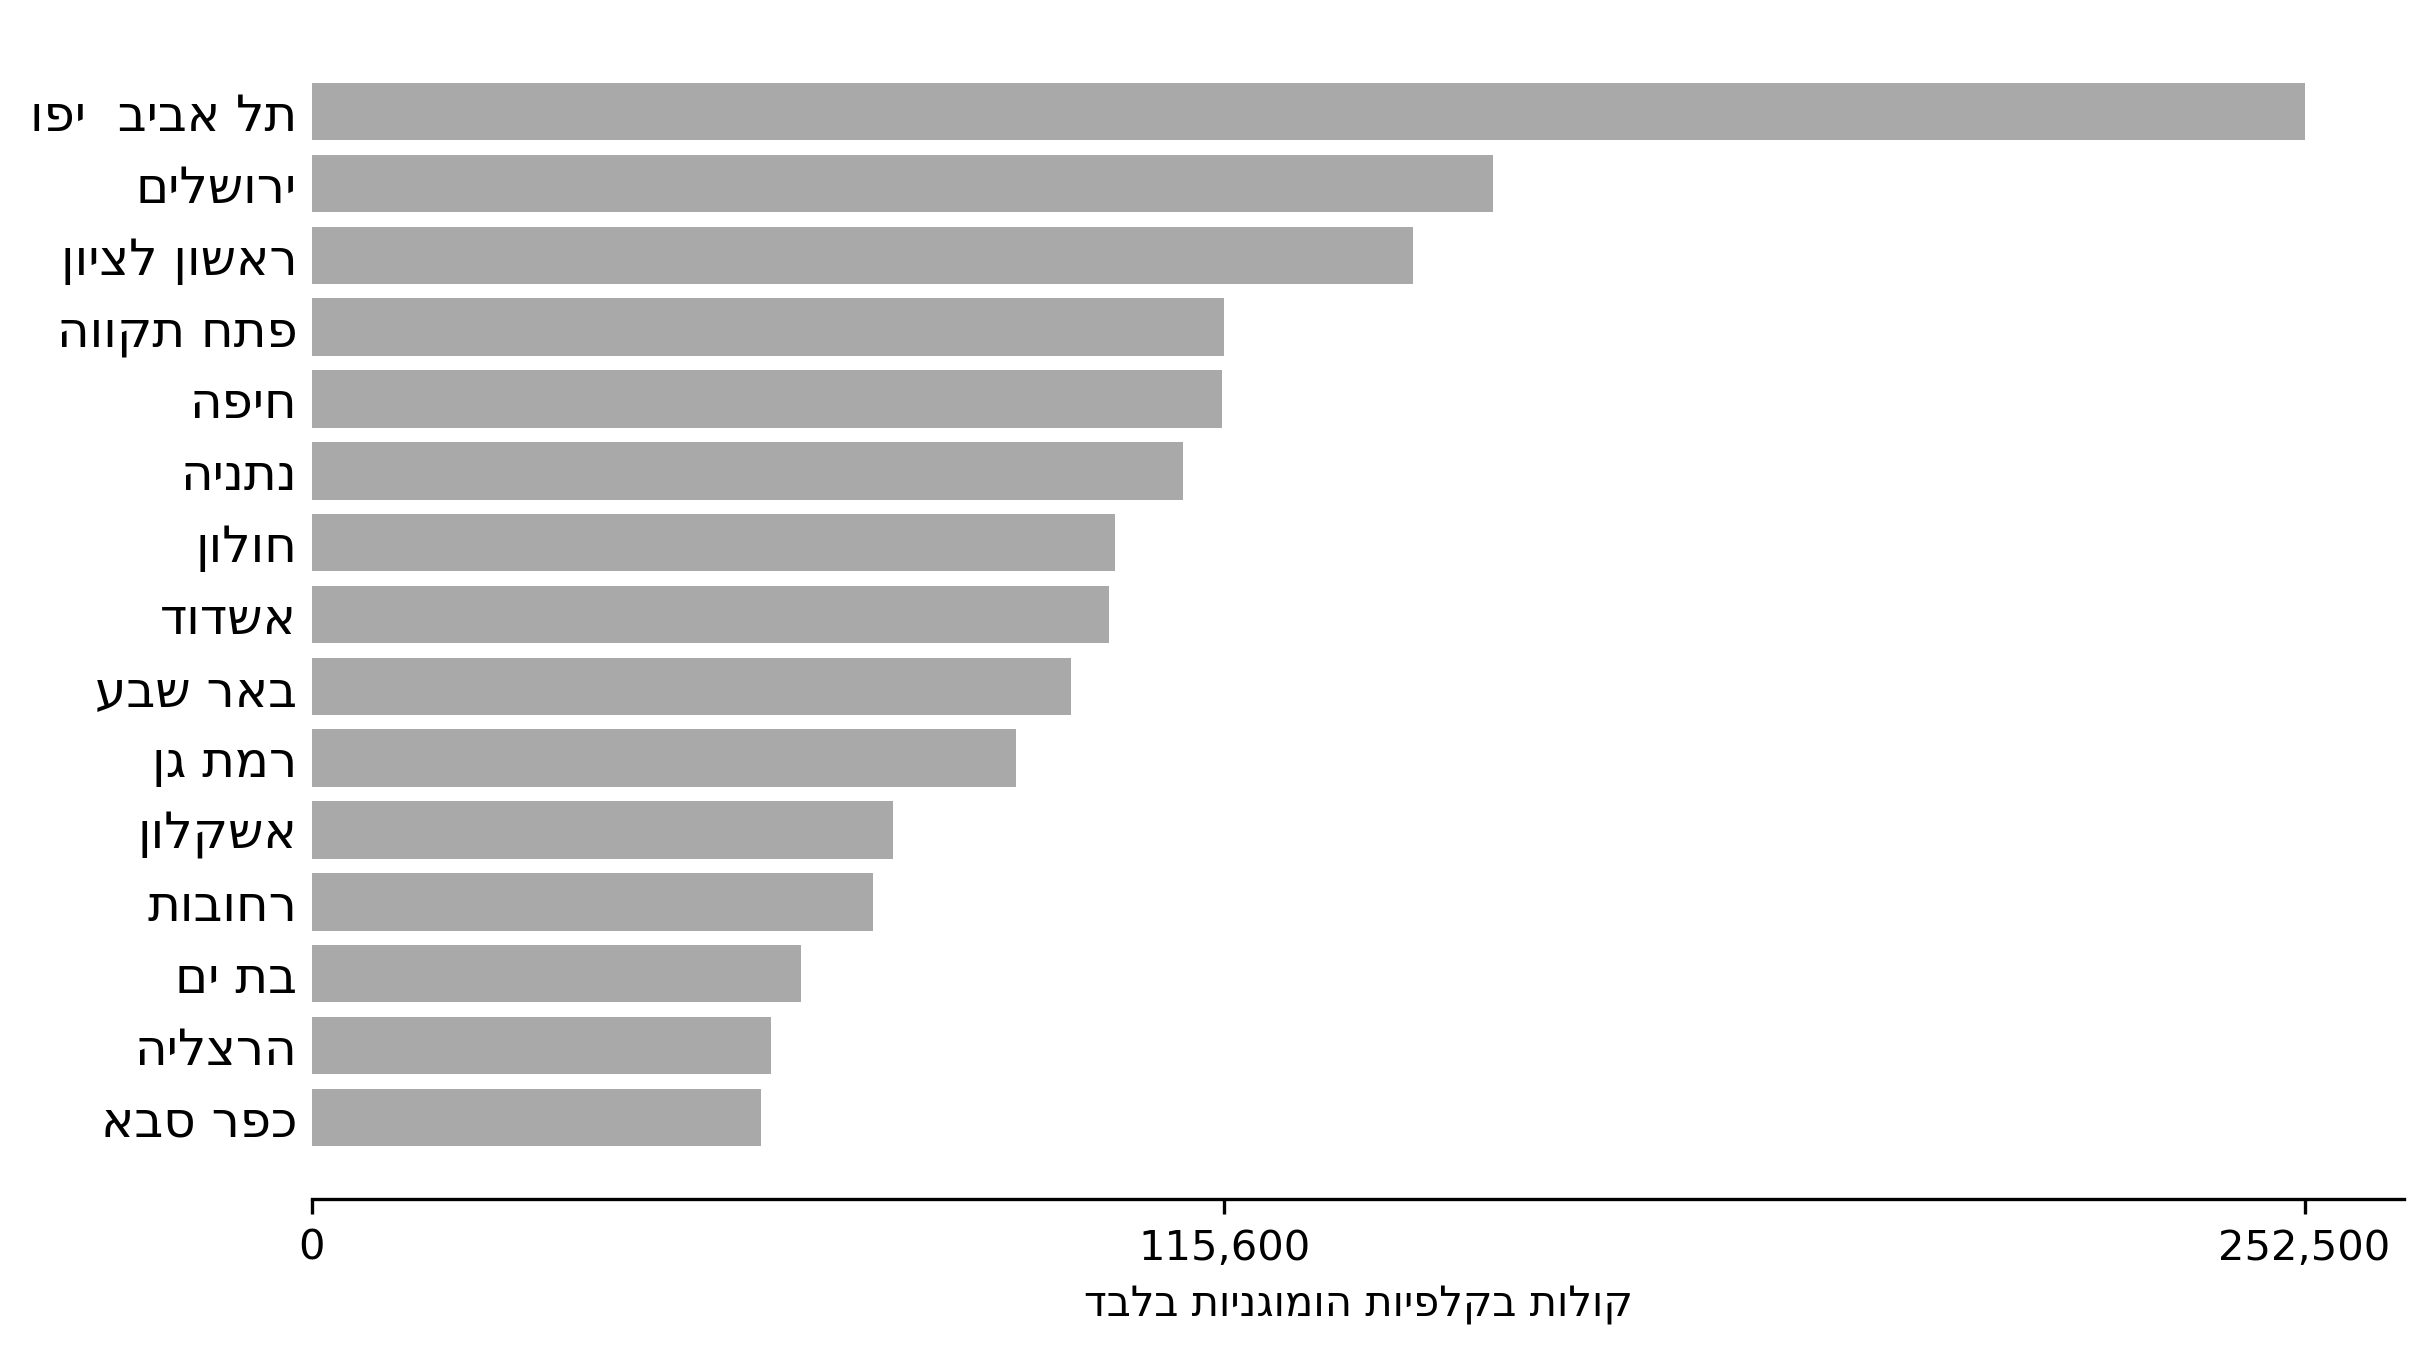

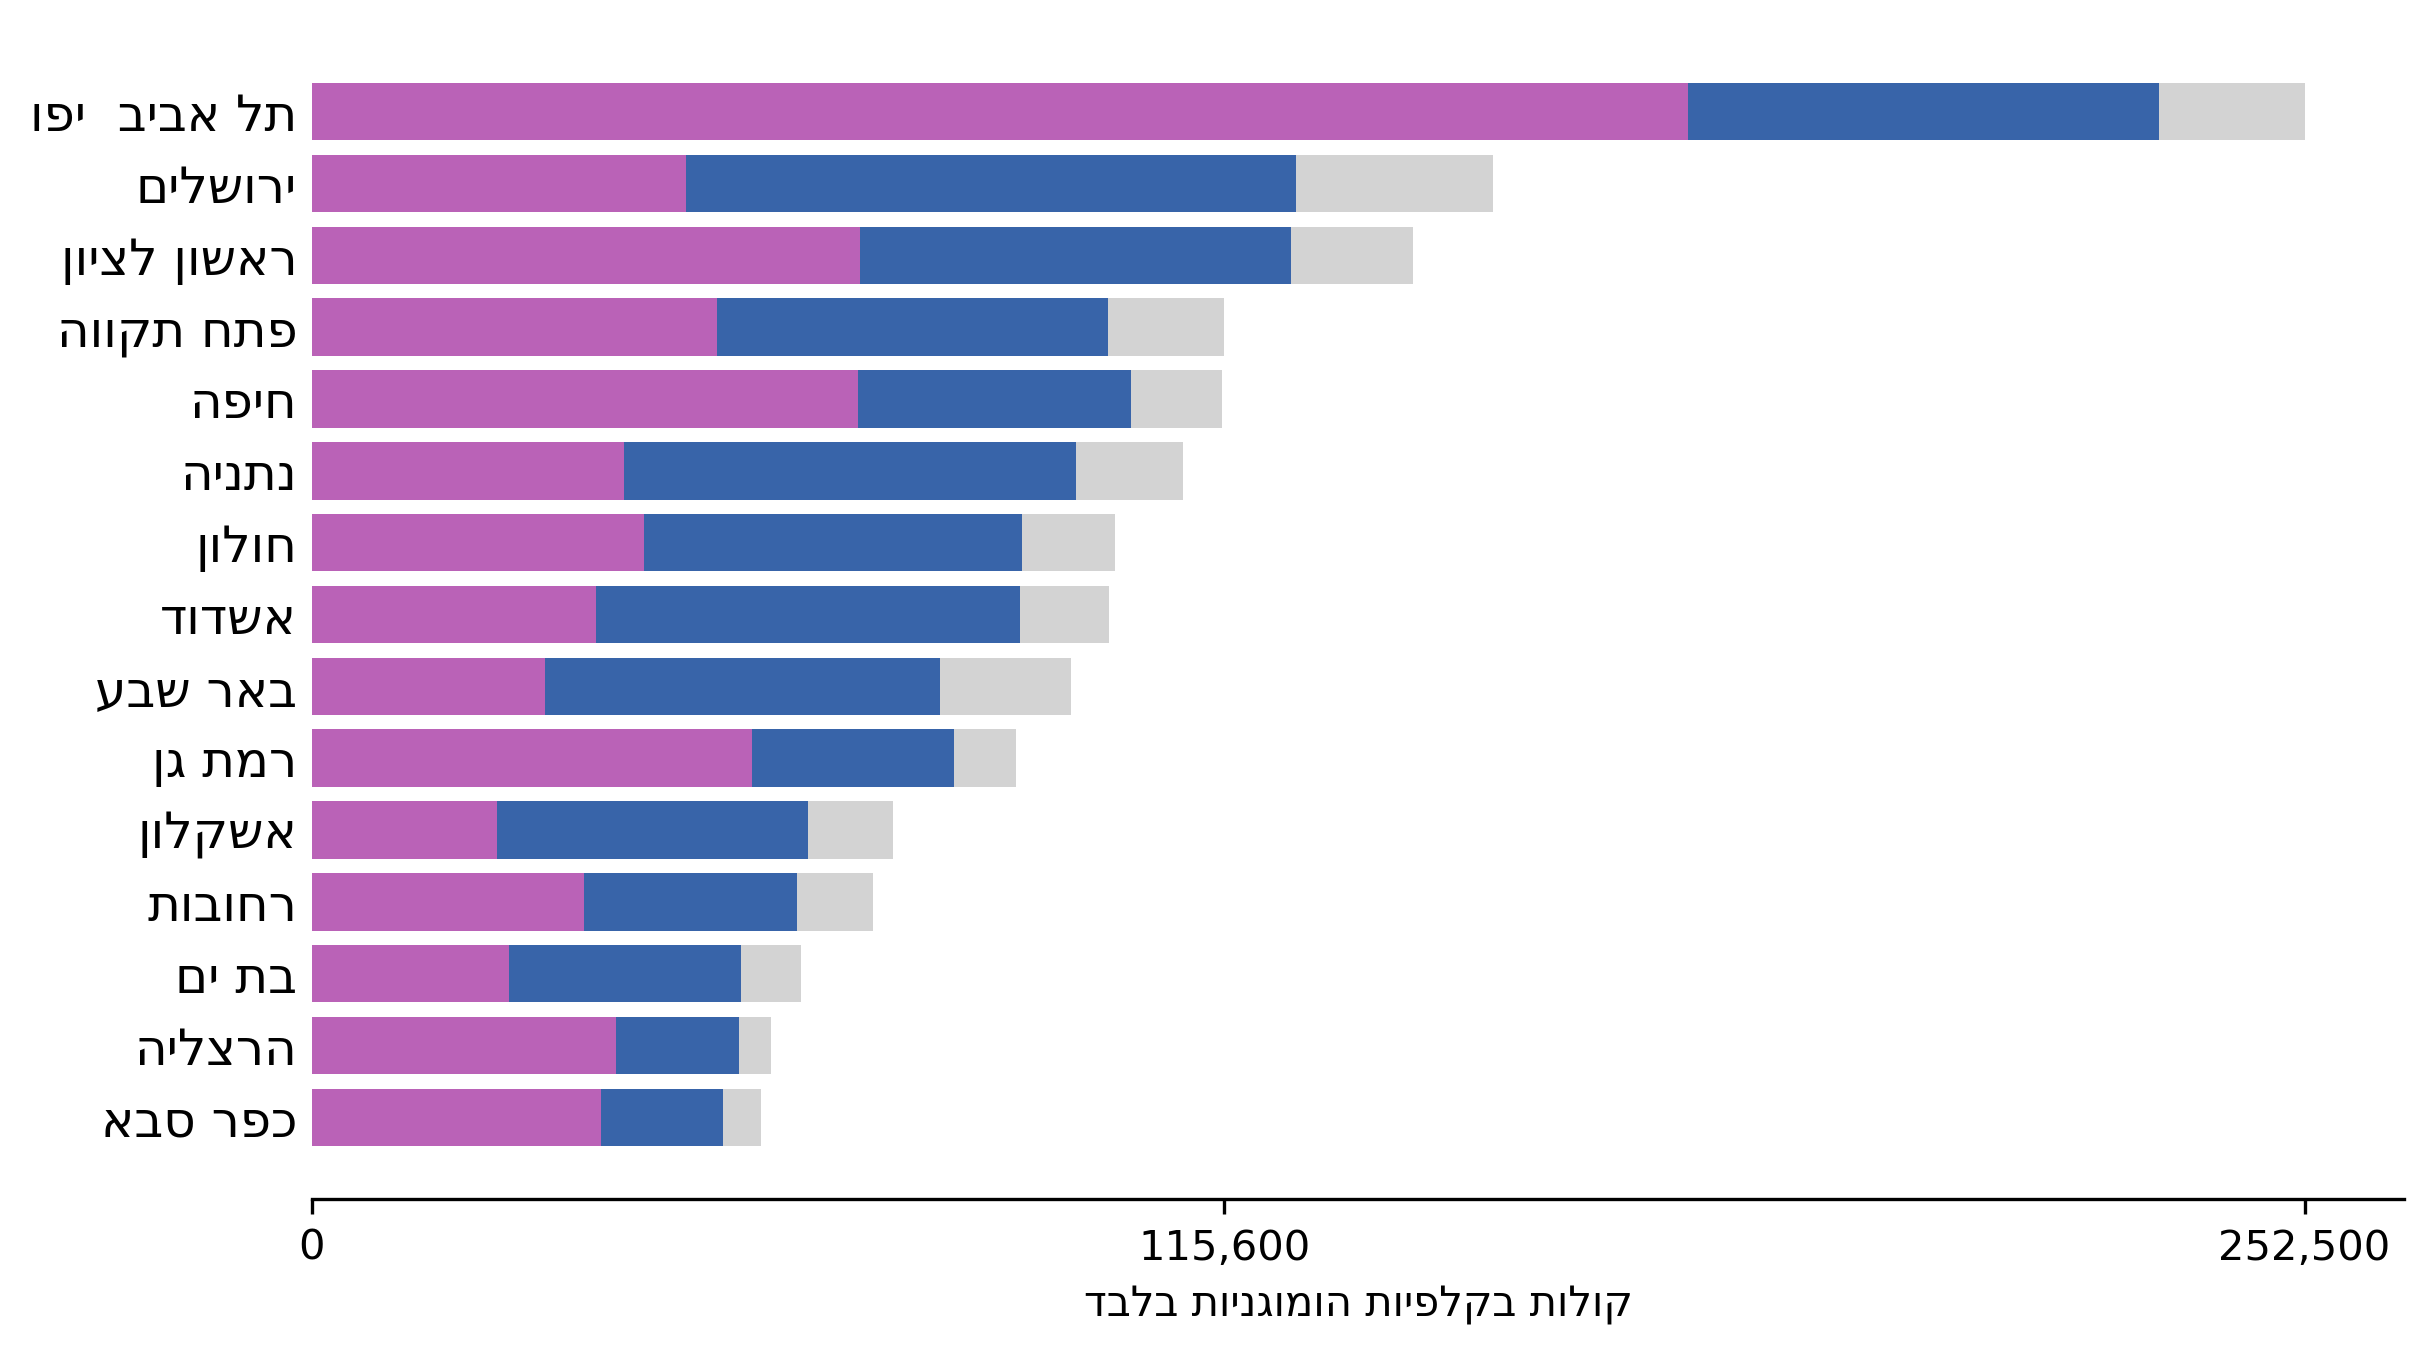

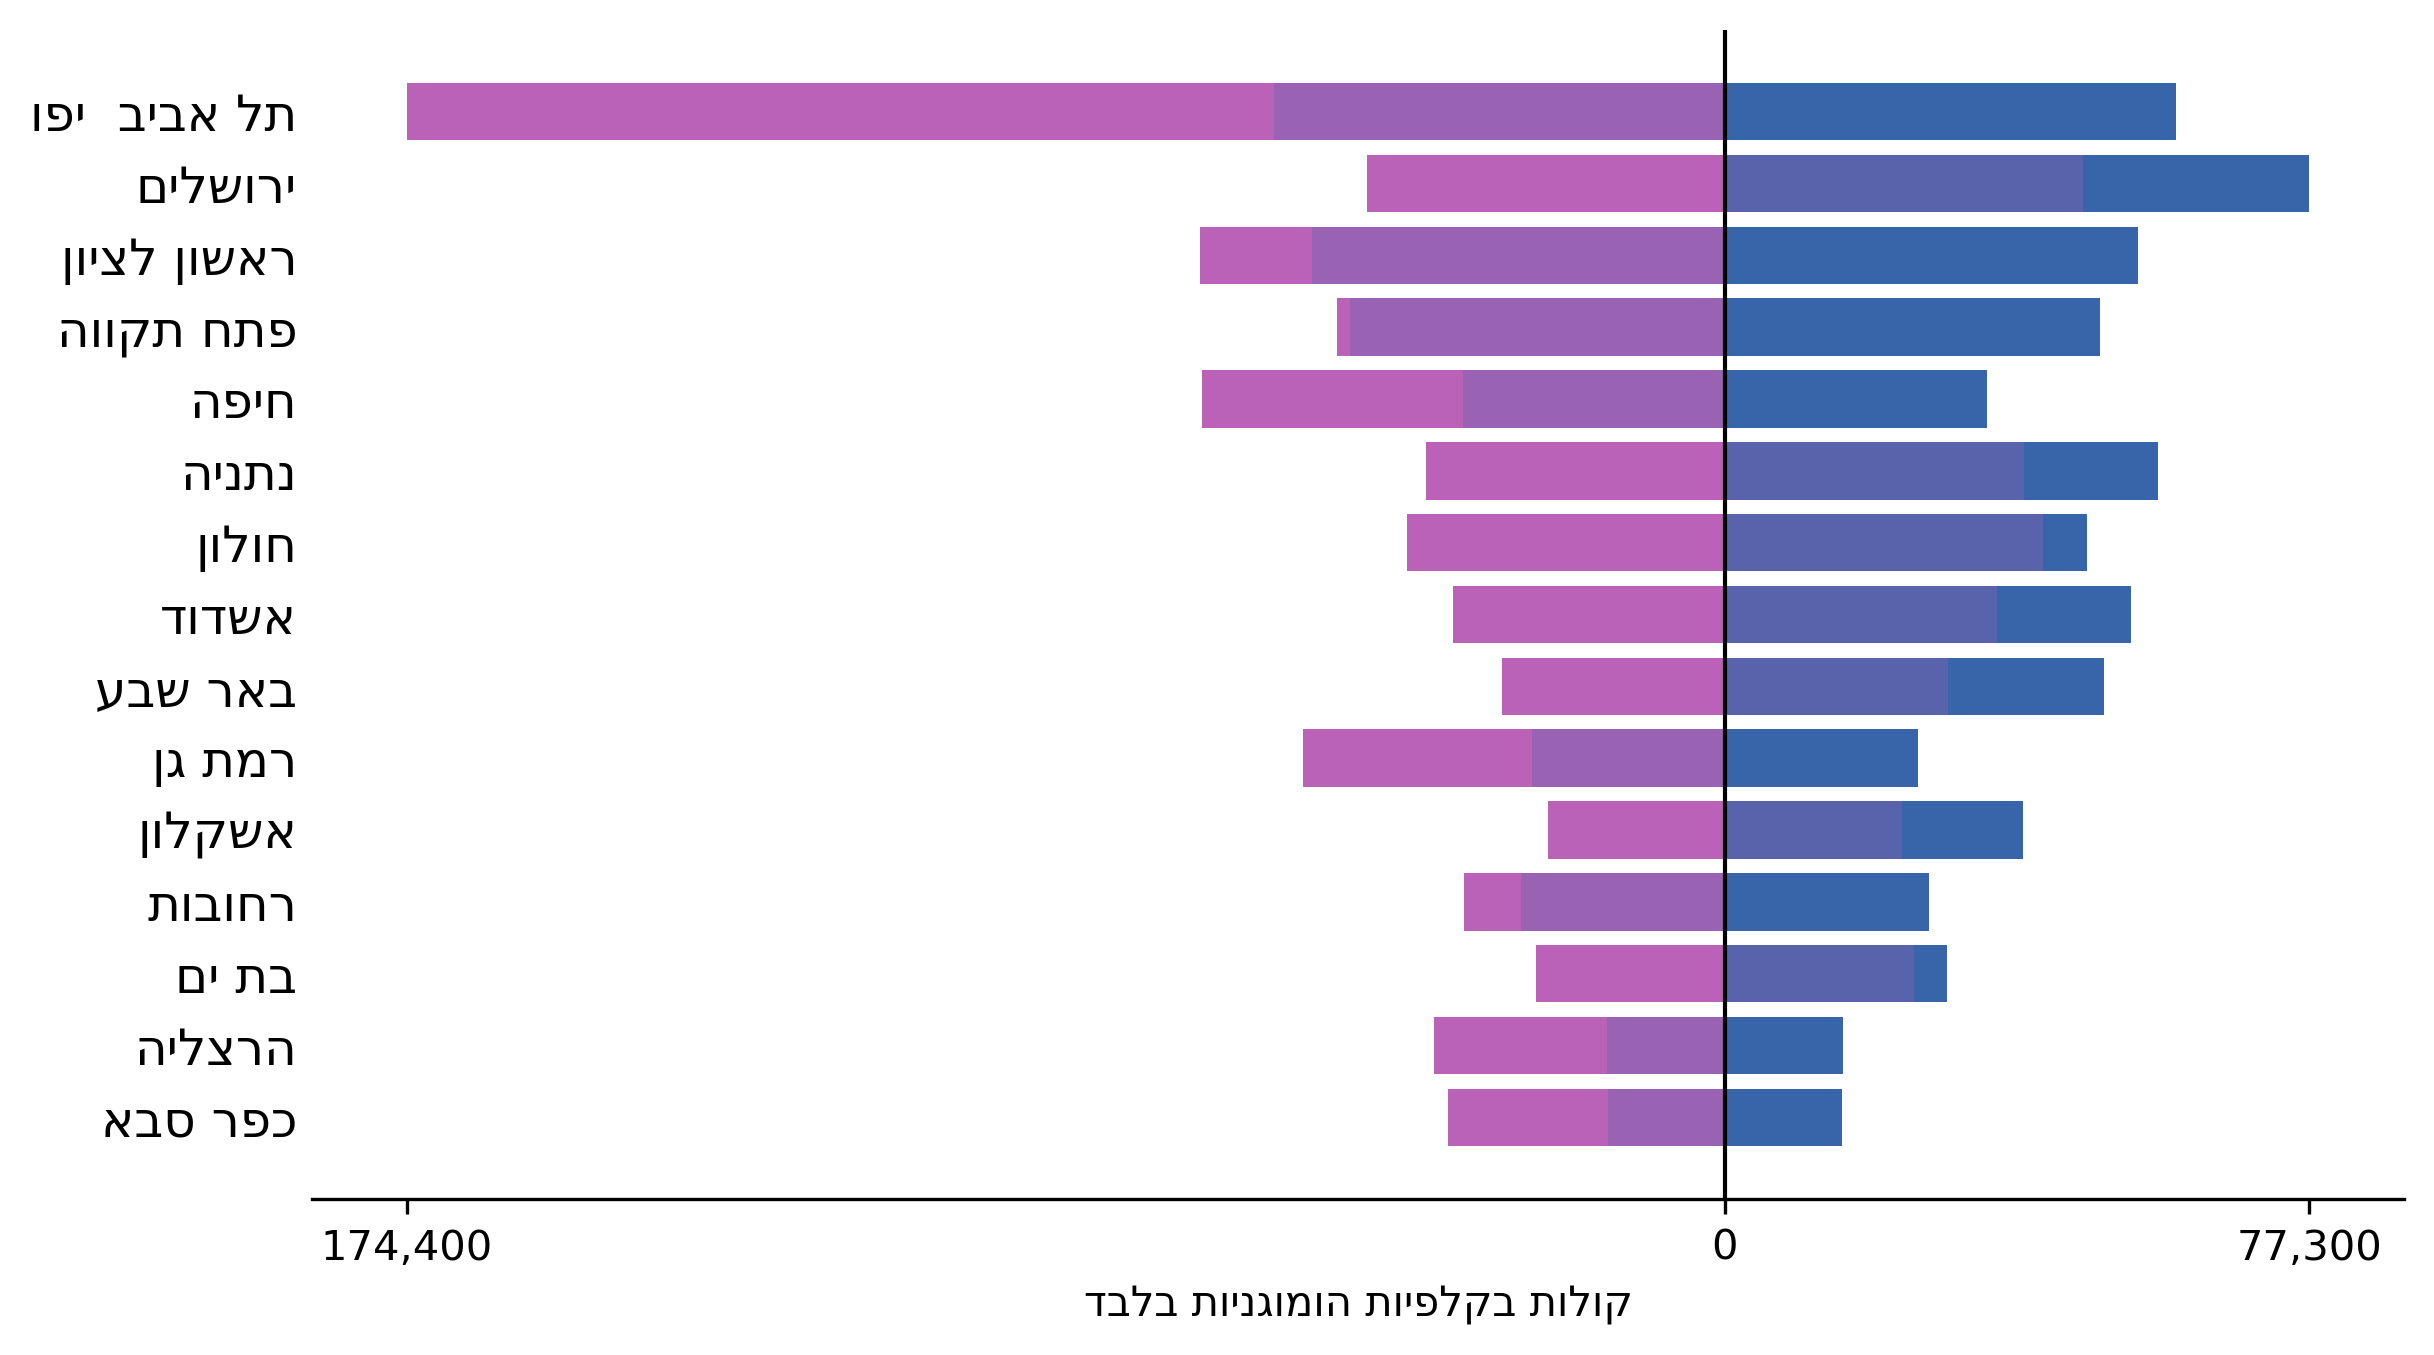

In [56]:
for what in ["total", "split", "difference"]:
    plot_ralab_data(df_25_city_homogenic, what)


  0%|          | 0/15 [00:00<?, ?it/s]

Text(0.13, 15, 'דודשאב םידרחה תדרפה')

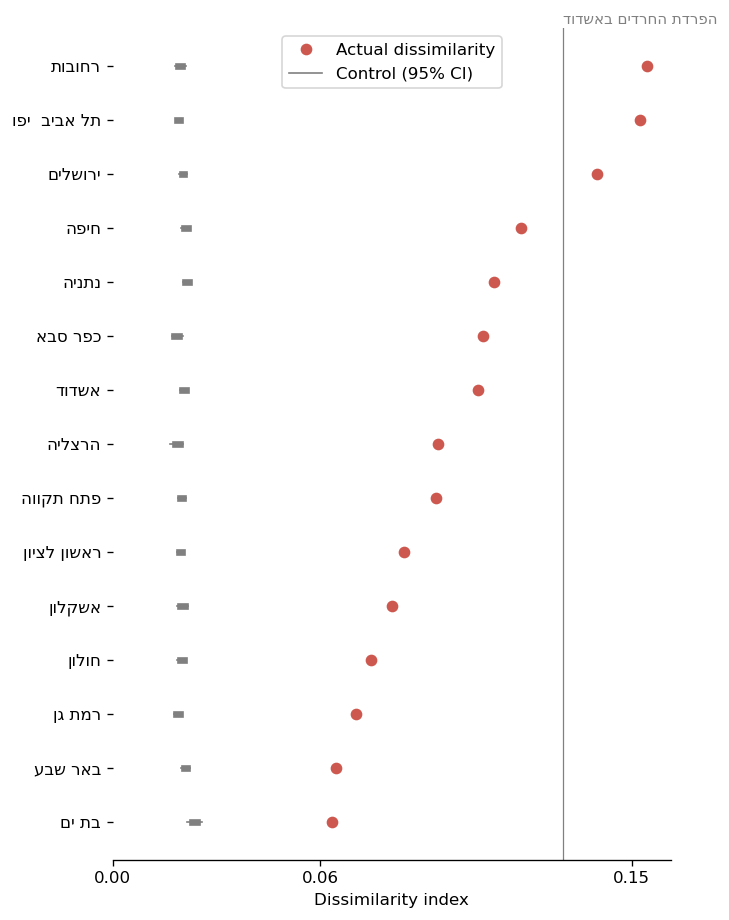

In [48]:
df_25_boxes_homogenic["knesset_number"] = 25
df_25['knesset_number'] = 25
res = da.analyze_city_data(df_25_boxes_homogenic, 'group_rab', 'group_ralab')
res  = da.prepare_data_for_plot(res)
ax = da.plot_dissimilarity_latest_point(res, main_color="#cd584f")
# set 0.13 vertical line and label it with heb("הפרדת החרדים באשדוד")
ax.axvline(0.13, color="gray", linewidth=0.75)
ax.text(0.13, len(res), pu.heb("הפרדת החרדים באשדוד"), ha="left", va="top", fontsize=9, color='gray')

In [14]:
df_25

,city_name,city_code,can_vote,voted,legal,party_avoda,party_ihud_leumi,party_bayit_yehudi,party_agudat_israel,party_daam,...,party_kalkala_yehudit,party_kaf_kuf,party_kulanu,party_kavod_ezrahi,party_habayit_hayehudi,party_shas,party_tikva,group_ralab,group_rab,knesset_number
0,אבו גווייעד שבט,967,570,173,169,0,0,0,0,4,...,0,0,0,0,0,0,2,1,9,25
1,אבו גווייעד שבט,967,570,96,95,1,0,0,0,0,...,0,0,0,0,0,0,1,1,1,25
2,אבו גווייעד שבט,967,570,169,168,0,0,0,0,0,...,0,0,0,0,0,2,0,4,2,25
3,אבו גווייעד שבט,967,569,111,108,0,0,0,0,0,...,0,0,0,0,0,2,0,1,5,25
4,אבו גוש,472,598,360,353,1,0,0,0,171,...,0,0,0,0,0,0,0,16,11,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12540,תקוע,3563,500,367,364,4,3,66,1,0,...,0,0,0,6,0,12,0,34,165,25
12541,תקוע,3563,582,426,423,6,3,66,3,0,...,1,0,0,1,0,3,0,58,155,25
12542,תראבין אצאנע שבט,970,582,74,72,0,0,0,0,0,...,0,0,0,0,0,0,0,1,28,25
12543,תראבין אצאנעישוב,1346,650,248,243,1,0,0,0,6,...,0,0,0,1,0,1,0,4,144,25


In [13]:
res = da.analyze_city_data(df_25, "group_rab", "group_ralab")
res = da.prepare_data_for_plot(res)
da.plot_dissimilarity_latest_point(res, main_color="#63a65a")


  0%|          | 0/1216 [00:00<?, ?it/s]

KeyError: 'party_1'

In [97]:

actions = load_action_config()

In [98]:
actions.post_actions

In [ ]:
actions